# Google Fonts

In [1]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


['NanumBarunGothic'] 11.0


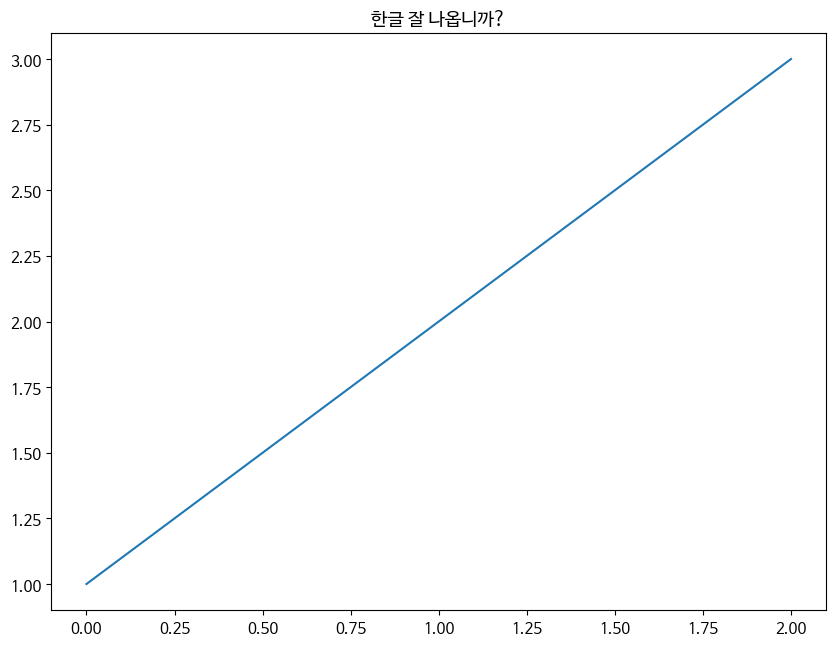

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# Google Drive

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기

In [5]:
# MovieLens의 데이터셋을 data 디렉터리에 다운로드 한 뒤 압축을 푼다
!wget -nc --no-check-certificate https://files.grouplens.org/datasets/movielens/ml-10m.zip -P ../data
!unzip -n ../data/ml-10m.zip -d ../data/

--2024-12-09 06:30:19--  https://files.grouplens.org/datasets/movielens/ml-10m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65566137 (63M) [application/zip]
Saving to: ‘../data/ml-10m.zip’

ml-10m.zip          100%[===================>]  62.53M  23.6MB/s    in 2.6s    

2024-12-09 06:30:23 (23.6 MB/s) - ‘../data/ml-10m.zip’ saved [65566137/65566137]

Archive:  ../data/ml-10m.zip
   creating: ../data/ml-10M100K/
  inflating: ../data/ml-10M100K/allbut.pl  
  inflating: ../data/ml-10M100K/movies.dat  
  inflating: ../data/ml-10M100K/ratings.dat  
  inflating: ../data/ml-10M100K/README.html  
  inflating: ../data/ml-10M100K/split_ratings.sh  
  inflating: ../data/ml-10M100K/tags.dat  


# 데이터 개요

## 영화 정보

In [6]:
import pandas as pd

# 영화정보 로딩(10681작품)
# movieID와 제목만 사용
m_cols = ['movie_id', 'title', 'genre']
movies = pd.read_csv('../data/ml-10M100K/movies.dat', names=m_cols, sep='::' , encoding='latin-1', engine='python')

# genre를 list 형식으로 저장한다
movies['genre'] = movies.genre.apply(lambda x:x.split('|'))
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


## 태그 정보

In [7]:
# 사용자 부여한 영화의 태그 정보 로딩
t_cols = ['user_id', 'movie_id', 'tag', 'timestamp']
user_tagged_movies = pd.read_csv('../data/ml-10M100K/tags.dat', names=t_cols, sep='::', engine='python')

# tag를 소문자로 한다
user_tagged_movies['tag'] = user_tagged_movies['tag'].str.lower()

user_tagged_movies.head()

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


In [8]:
print(f'태그 종류={len(user_tagged_movies.tag.unique())}')
print(f'태그 레코드 수={len(user_tagged_movies)}')
print(f'태그가 붙어있는 영화 수={len(user_tagged_movies.movie_id.unique())}')

태그 종류=15241
태그 레코드 수=95580
태그가 붙어있는 영화 수=7601


- Tag를 영화별로 List 형식으로 저장 및 결합

In [9]:
# tag를 영화별로 list 형식으로 저장한다
movie_tags = user_tagged_movies.groupby('movie_id').agg({'tag':list})

# 내그 정보를 결합한다
movies = movies.merge(movie_tags, on='movie_id', how='left')

movies.head()

,movie_id,title,genre,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[pixar, pixar, pixar, animation, pixar, animat..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[for children, game, animals, joe johnston, ro..."
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[funniest movies, comedinha de velhinhos engra..."
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",[girl movie]
4,5,Father of the Bride Part II (1995),[Comedy],"[steve martin, pregnancy, remake, steve martin..."


In [10]:
# 평갓값 데이터 로딩
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../data/ml-10M100K/ratings.dat', names=r_cols, sep='::', engine='python')
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


- 데이터 감소

In [11]:
# 영화 데이터와 평가 데이터를 결합한다
movielens = ratings.merge(movies, on='movie_id')
movielens.head()

,user_id,movie_id,rating,timestamp,title,genre,tag
0,1,122,5.0,838985046,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
1,1,185,5.0,838983525,"Net, The (1995)","[Action, Crime, Thriller]","[computers, computers, internet, irwin winkler..."
2,1,231,5.0,838983392,Dumb & Dumber (1994),[Comedy],"[jeff daniels, jim carrey, stupid, jim carrey,..."
3,1,292,5.0,838983421,Outbreak (1995),"[Action, Drama, Sci-Fi, Thriller]","[biology, gross, disease, futuristmovies.com, ..."
4,1,316,5.0,838983392,Stargate (1994),"[Action, Adventure, Sci-Fi]","[egypt, space, time travel, time travel, alien..."


In [12]:
print(f'unique_users={len(movielens.user_id.unique())}, unique_movies={len(movielens.movie_id.unique())}')

unique_users=69878, unique_movies=10677


## 사용자 1000명 평가

### 사용자

In [13]:
import numpy as np

# 사용자 정보
movielens.groupby('user_id').agg({'movie_id': len}).agg({'movie_id':[min, max, np.mean, len]})

<ipython-input-13-0a477b65ad2f>:4: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  movielens.groupby('user_id').agg({'movie_id': len}).agg({'movie_id':[min, max, np.mean, len]})
<ipython-input-13-0a477b65ad2f>:4: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  movielens.groupby('user_id').agg({'movie_id': len}).agg({'movie_id':[min, max, np.mean, len]})
<ipython-input-13-0a477b65ad2f>:4: FutureWarning: The provided callable <function mean at 0x7cfee89f95a0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  movielens.group

,movie_id
min,20.00000
max,7359.00000
mean,143.10733
len,69878.00000


### 영화

In [14]:
# 영화 정보
movielens.groupby('movie_id').agg({'user_id': len}).agg({'user_id':[min, max, np.mean, len]})

<ipython-input-14-fb493065686a>:2: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  movielens.groupby('movie_id').agg({'user_id': len}).agg({'user_id':[min, max, np.mean, len]})
<ipython-input-14-fb493065686a>:2: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  movielens.groupby('movie_id').agg({'user_id': len}).agg({'user_id':[min, max, np.mean, len]})
<ipython-input-14-fb493065686a>:2: FutureWarning: The provided callable <function mean at 0x7cfee89f95a0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  movielens.groupby

,user_id
min,1.000000
max,34864.000000
mean,936.597733
len,10677.000000


### 평갓값

In [16]:
print(f'평갓값 수={len(movielens)}')
movielens.groupby('rating').agg({'movie_id': len})

평갓값 수=10000054


,movie_id
rating,
0.5,94988
1.0,384180
1.5,118278
2.0,790306
2.5,370178
3.0,2356676
3.5,879764
4.0,2875850
4.5,585022


<Axes: xlabel='rating'>

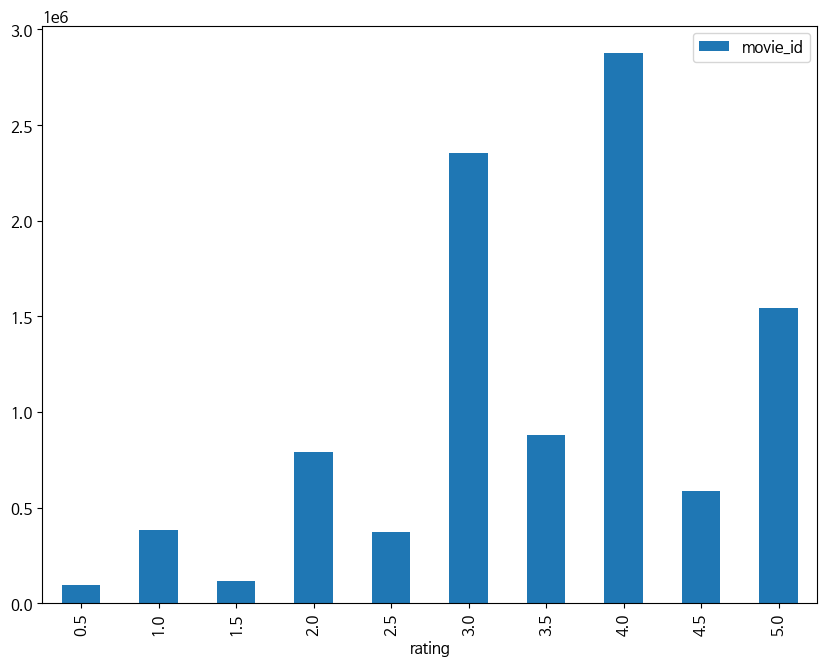

In [17]:
movielens.groupby('rating').agg({'movie_id': len}).plot.bar()

# 데이터셋 분리
- 가장 최근에 평가한 5개 영화의 평가값을 테스트용으로 남겨두기

In [18]:
# 학습용과 테스트용으로 데이터를 분할한다
# 각 사용자의 직전 5건의 영화를 평가용으로 사용하고, 그 이외는 학습용으로 한다
# 먼저, 각 사용자가 평가한 영화의 순서를 계산한다
# 직전에 부여한 영화부터 순번을 부여한다(1부터 시작)

movielens['timestamp_rank'] = movielens.groupby(
    'user_id')['timestamp'].rank(ascending=False, method='first')
movielens_train = movielens[movielens['timestamp_rank'] > 5]
movielens_test = movielens[movielens['timestamp_rank']<= 5]

# 평가방법
- RMSE

In [19]:
from typing import List
from sklearn.metrics import mean_squared_error

def calc_rmse(self, true_rating: List[float], pred_rating: List[float]) -> float:
  return np.sqrt(mean_squared_error(true_rating, pred_rating))

- 그 외 평가지표 : Precision@K, Recall@K

In [20]:
import dataclasses
import pandas as pd
from typing import Dict, List

@dataclasses.dataclass(frozen=True)
# 추천 시스템의 학습과 평가에 사용하는 데이터셋
class Dataset:
    # 학습용 평갓값 데이터셋
    train: pd.DataFrame
    # 테스트용 평갓값 데이터셋
    test: pd.DataFrame
    # 순위 지표의 테스트 데이터셋. 키는 사용자 ID, 값은 사용자가 높이 평가한 아이템의 ID 리스트
    test_user2items: Dict[int, List[int]]
    # 아이템 콘텐츠 정보
    item_content: pd.DataFrame


@dataclasses.dataclass(frozen=True)
# 추천 시스템 예측 결과
class RecommendResult:
    # 테스트 데이터셋의 예측 평갓값. RMSE 평가
    rating: pd.DataFrame
    # 키는 사용자 ID, 값은 추천 아이템 ID 리스트. 순위 지표 평가.
    user2items: Dict[int, List[int]]


@dataclasses.dataclass(frozen=True)
# 추천 시스템 평가
class Metrics:
    rmse: float
    precision_at_k: float
    recall_at_k: float

    # 평가 결과는 소수 셋째 자리까지만 출력한다
    def __repr__(self):
        return f"rmse={self.rmse:.3f}, Precision@K={self.precision_at_k:.3f}, Recall@K={self.recall_at_k:.3f}"

In [23]:
import pandas as pd
import os
# from util.models import Dataset

class DataLoader:
    def __init__(self, num_users: int = 1000, num_test_items: int = 5, data_path: str = "../data/ml-10M100K/"):
        self.num_users = num_users
        self.num_test_items = num_test_items
        self.data_path = data_path

    def load(self) -> Dataset:
        ratings, movie_content = self._load()
        movielens_train, movielens_test = self._split_data(ratings)
        # ranking 용 평가 데이터는 각 사용자의 평갓값이 4 이상인 영화만을 정답으로 한다
        # 키는 사용자 ID, 값은 사용자가 높이 평가한 아이템의 ID 리스트
        movielens_test_user2items = (
            movielens_test[movielens_test.rating >= 4].groupby("user_id").agg({"movie_id": list})["movie_id"].to_dict()
        )
        return Dataset(movielens_train, movielens_test, movielens_test_user2items, movie_content)

    def _split_data(self, movielens: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
        # 학습용과 테스트용으로 데이터를 분할한다
        # 각 사용자의 직전 5개 영화를 평가용으로 사용하고, 그 이외는 학습용으로 한다
        # 먼저, 각 사용자가 평가한 영화의 순서를 계산한다
        # 최근 부여한 영화부터 순서를 부여한다(0부터 시작)
        movielens["rating_order"] = movielens.groupby("user_id")["timestamp"].rank(ascending=False, method="first")
        movielens_train = movielens[movielens["rating_order"] > self.num_test_items]
        movielens_test = movielens[movielens["rating_order"] <= self.num_test_items]
        return movielens_train, movielens_test

    def _load(self) -> (pd.DataFrame, pd.DataFrame):
        # 영화 정보 로딩(10197 작품)
        # movie_id와 제목만 사용
        m_cols = ["movie_id", "title", "genre"]
        movies = pd.read_csv(
            os.path.join(self.data_path, "movies.dat"), names=m_cols, sep="::", encoding="latin-1", engine="python"
        )
        # genre를 list 형식으로 저장한다
        movies["genre"] = movies.genre.apply(lambda x: x.split("|"))

        # 사용자가 부여한 영화의 태그 정보를 로딩한다
        t_cols = ["user_id", "movie_id", "tag", "timestamp"]
        user_tagged_movies = pd.read_csv(
            os.path.join(self.data_path, "tags.dat"), names=t_cols, sep="::", engine="python"
        )
        # tag를 소문자로 한다
        user_tagged_movies["tag"] = user_tagged_movies["tag"].str.lower()
        movie_tags = user_tagged_movies.groupby("movie_id").agg({"tag": list})

        # 태그 정보를 결합한다
        movies = movies.merge(movie_tags, on="movie_id", how="left")

        # 평가 데이터를 로딩한다
        r_cols = ["user_id", "movie_id", "rating", "timestamp"]
        ratings = pd.read_csv(os.path.join(self.data_path, "ratings.dat"), names=r_cols, sep="::", engine="python")

        # user 수를 num_users로 줄인다
        valid_user_ids = sorted(ratings.user_id.unique())[: self.num_users]
        ratings = ratings[ratings.user_id <= max(valid_user_ids)]

        # 위 데이터를 결합한다
        movielens_ratings = ratings.merge(movies, on="movie_id")

        return movielens_ratings, movies

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error
# from util.models import Metrics
from typing import Dict, List


class MetricCalculator:
    def calc(
        self,
        true_rating: List[float],
        pred_rating: List[float],
        true_user2items: Dict[int, List[int]],
        pred_user2items: Dict[int, List[int]],
        k: int,
    ) -> Metrics:
        rmse = self._calc_rmse(true_rating, pred_rating)
        precision_at_k = self._calc_precision_at_k(true_user2items, pred_user2items, k)
        recall_at_k = self._calc_recall_at_k(true_user2items, pred_user2items, k)
        return Metrics(rmse, precision_at_k, recall_at_k)

    def _precision_at_k(self, true_items: List[int], pred_items: List[int], k: int) -> float:
        if k == 0:
            return 0.0

        p_at_k = (len(set(true_items) & set(pred_items[:k]))) / k
        return p_at_k

    def _recall_at_k(self, true_items: List[int], pred_items: List[int], k: int) -> float:
        if len(true_items) == 0 or k == 0:
            return 0.0

        r_at_k = (len(set(true_items) & set(pred_items[:k]))) / len(true_items)
        return r_at_k

    def _calc_rmse(self, true_rating: List[float], pred_rating: List[float]) -> float:
        return np.sqrt(mean_squared_error(true_rating, pred_rating))

    def _calc_recall_at_k(
        self, true_user2items: Dict[int, List[int]], pred_user2items: Dict[int, List[int]], k: int
    ) -> float:
        scores = []
        # テストデータに存在する各ユーザーのrecall@kを計算
        for user_id in true_user2items.keys():
            r_at_k = self._recall_at_k(true_user2items[user_id], pred_user2items[user_id], k)
            scores.append(r_at_k)
        return np.mean(scores)

    def _calc_precision_at_k(
        self, true_user2items: Dict[int, List[int]], pred_user2items: Dict[int, List[int]], k: int
    ) -> float:
        scores = []
        # 테스트 데이터에 존재하는 각 사용자의 precision@k를 계산한다
        for user_id in true_user2items.keys():
            p_at_k = self._precision_at_k(true_user2items[user_id], pred_user2items[user_id], k)
            scores.append(p_at_k)
        return np.mean(scores)

## 통일된 포맷 활용한 계산